# Imports

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
import pickle

# Datasets

In [2]:
df = pd.read_csv("../Data/train.csv",index_col="PassengerId")

# Overlook

In [3]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# Filling Nan

In [9]:
df["Embarked"] = df["Embarked"].fillna("S")

In [10]:
df["Cabin"] = df["Cabin"].fillna("N")

# Preprocessing

In [11]:
df["Name"] = df["Name"].map(lambda y : re.search(r'(?<=,)(.*)',y).group(1).strip())

In [12]:
df["Cabin"] = df["Cabin"].map(lambda y : y[0])

In [13]:
df["Family"] = df["SibSp"]+df["Parch"]+1

In [14]:
df.groupby(["Family"])["Survived"].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [15]:
df["Family"].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [16]:
df["Family"]=df["Family"].map(lambda y : "Big" if y>4 else "Alone" if y == 1 else "Small")

# Droping col

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Family    891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [18]:
df = df.drop(columns = ["Ticket","Parch","SibSp"])

In [19]:
df.sample(5)

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,
551,1,1,Mr. John Borland Jr,male,17.0,110.8833,C,C,Small
369,1,3,Miss. Annie,female,NaN,7.7500,N,Q,Alone
450,1,1,Major. Arthur Godfrey,male,52.0,30.5000,C,S,Alone
149,0,2,"Mr. Michel (""Louis M Hoffman"")",male,36.5,26.0000,F,S,Small
740,0,3,Mr. Minko,male,NaN,7.8958,N,S,Alone


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    object 
 7   Embarked  891 non-null    object 
 8   Family    891 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 69.6+ KB


# Input Output

In [23]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [24]:
x

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,
1,3,Mr. Owen Harris,male,22.0,7.2500,N,S,Small
2,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,71.2833,C,C,Small
3,3,Miss. Laina,female,26.0,7.9250,N,S,Alone
4,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,53.1000,C,S,Small
5,3,Mr. William Henry,male,35.0,8.0500,N,S,Alone
...,...,...,...,...,...,...,...,...
887,2,Rev. Juozas,male,27.0,13.0000,N,S,Alone
888,1,Miss. Margaret Edith,female,19.0,30.0000,B,S,Alone
889,3,"Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,N,S,Small


# Graphs

<Axes: xlabel='Pclass', ylabel='Survived'>

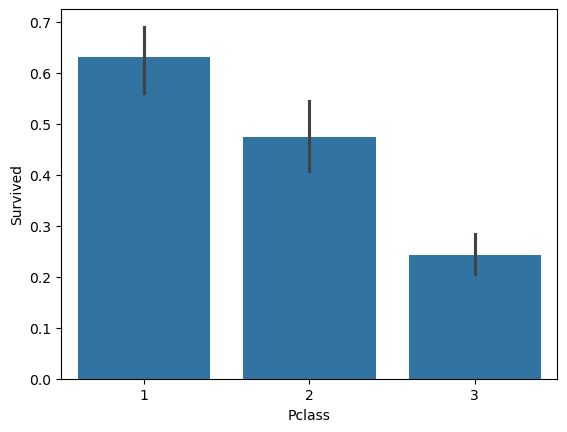

In [25]:
sns.barplot(x=x["Pclass"],y = y)

<Axes: xlabel='Embarked', ylabel='Survived'>

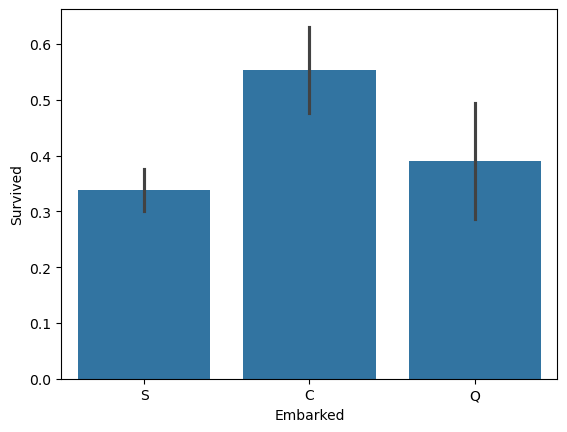

In [26]:
sns.barplot(x=x["Embarked"],y = y)

<Axes: xlabel='Name', ylabel='Survived'>

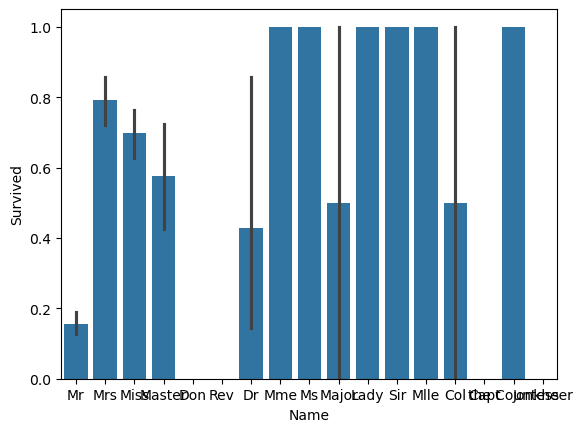

In [27]:
sns.barplot(x=x["Name"].map(lambda y : re.search(r'(.*?)(?=\.)',y).group(1).strip()),y = y)

<Axes: xlabel='Cabin', ylabel='Survived'>

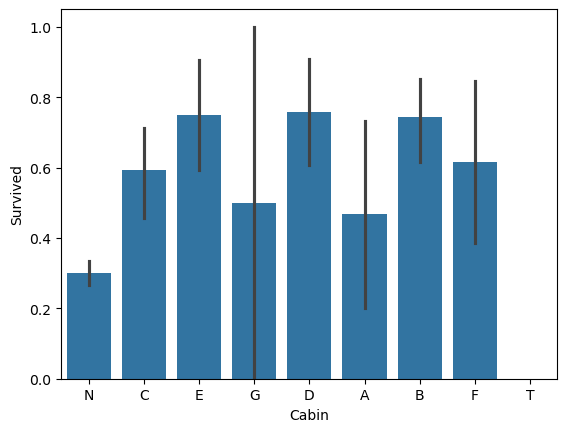

In [28]:
sns.barplot(x=x["Cabin"],y = y)

# Functions

In [29]:
def a_fun(y):
    return re.search(r'(.*?)(?=\.)',y).group(1).strip()

In [49]:
def ap(x):
    return x.map(a_fun)

In [51]:
fun_name = FunctionTransformer(ap, validate=False)

In [31]:
def a_fun2(val):
    return "Rare" if val in ["Master","Dr","Rev","Major","Col","Mlle","Capt","Sir","Jonkheer","Mme","Don","Ms","Lady","the Countess"] else val

In [20]:
def ap2(x):
    return x.map(a_fun2)

In [52]:
fun_name1 = FunctionTransformer(ap2,validate = False)

# Encoder

In [53]:
ohe = OneHotEncoder(sparse_output=False)

In [54]:
ordi = OrdinalEncoder(categories=[["Mr","Rare","Miss","Mrs"],["Big","Alone","Small"]])

In [55]:
age = KNNImputer()

In [56]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    object 
 6   Embarked  891 non-null    object 
 7   Family    891 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


# Function Transformer

In [57]:
trf1 = ColumnTransformer(transformers=[('Name',fun_name,[1])],remainder = 'passthrough')

In [58]:
trf1_2 = ColumnTransformer(transformers=[('Name',fun_name1,[0])],remainder = 'passthrough')

In [59]:
trf2 = ColumnTransformer(transformers=[('Ohe',ohe,[2,5,6]),('Ord',ordi,[0,7])],remainder = 'passthrough')

In [60]:
trf3 = ColumnTransformer(transformers=[('KNN',age,[17])],remainder = 'passthrough')

# Pipeline

In [61]:
P2 = Pipeline([('Impute Cabin,Embarked,Name',trf1),('Firstletter',trf1_2),('Encoder',trf2),('KNN',trf3),('clf',DecisionTreeClassifier())])

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
P2.set_output(transform = "pandas")
P2.fit(x_train,y_train)
y_predict = P2.predict(x_test)
y_predict

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

# Metrices

In [63]:
accuracy_score(y_predict,y_test)

0.7892376681614349

In [64]:
f1_score(y_test,y_predict)

0.7374301675977654

In [65]:
confusion_matrix(y_test,y_predict)

array([[110,  24],
       [ 23,  66]], dtype=int64)

# Testing

In [66]:
q = {"Pclass":[1],
"Name":["Miss.Rose DeWitt"],
"Sex":["female"],
"Age":[27],
"Fare":[60],
"Cabin":["C"],
"Embarked":["S"],
"Family":["Small"]}
q = pd.DataFrame(q)
ans = P2.predict(q)
ans

array([1], dtype=int64)

In [67]:
p = {"Pclass":[3],
"Name":["Mr.Jack Dawson"],
"Sex":["male"],
"Age":[29],
"Fare":[6],
"Cabin":["N"],
"Embarked":["C"],
"Family":["Alone"]}
p = pd.DataFrame(p)
ans = P2.predict(p)
ans

array([0], dtype=int64)

In [68]:
pickle.dump(P2,open('TitanicM.pkl','wb'))